# 2. Clustering for text analysis.

In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from scipy.spatial import distance
#from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt


In [58]:
#load the dataset
data_doc_word = np.load ("science2k-doc-word.npy")
data_word_doc = np.load ("science2k-word-doc.npy")
print(data_doc_word.shape)
print(data_doc_word)
print(data_word_doc.shape)
print(data_word_doc)
vocab = open("science2k-vocab.txt", "r").read().split()
titles = open("science2k-titles.txt", "r").read().split("\n")

(1373, 5476)
[[-0.2521619 -0.2521619  9.36371   ... -0.2521619 -0.2521619 -0.2521619]
 [-0.2875293 -0.2875293  8.229864  ... -0.2875293 -0.2875293 -0.2875293]
 [-0.3634041 -0.3634041  9.252468  ... -0.3634041 -0.3634041 -0.3634041]
 ...
 [10.04846   -0.7713402  9.132197  ... -0.7713402 -0.7713402 -0.7713402]
 [11.00702   -0.8423803 10.38288   ... -0.8423803 -0.8423803 -0.8423803]
 [ 9.710337  -0.7527946  9.556191  ... -0.7527946 -0.7527946 -0.7527946]]
(5476, 1373)
[[-6.755691   -6.755691   -6.755691   ...  4.064107    5.093713
   3.707441  ]
 [-4.028205   -4.028205   -4.028205   ... -4.028205   -4.028205
  -4.028205  ]
 [-0.03370464 -1.132184   -0.03370464 ...  0.2539608   1.57568
   0.6594092 ]
 ...
 [-0.1301101  -0.1301101  -0.1301101  ... -0.1301101  -0.1301101
  -0.1301101 ]
 [-0.05128021 -0.05128021 -0.05128021 ... -0.05128021 -0.05128021
  -0.05128021]
 [-0.06441435 -0.06441435 -0.06441435 ... -0.06441435 -0.06441435
  -0.06441435]]


(a) The extra data file science2k-doc-word.npy contains a 1373£5476 matrix, where each row
is an article in Science described by 5476 word features. The articles and words are in the
same order as in the vocabulary and titles files above. You can read this file using
numpy.load("science2k-doc-word.npy")
To obtain the features, we performed the following transformation. First, we computed perdocument
smoothed word frequencies. Second, we took the log of those frequencies. Finally,
we centered the per-document log frequencies to have zero mean.
Cluster the documents using k-means and various values of k (go up to at least k = 20).
Select a value of k.
For that value, report the top 10 words of each cluster in order of the largest positive distance
from the average value across all data. More specifically, if x is the 5476-vector of average
values across documents and mi is the i th mean, report the words associated with the top components in mi ¡x. Report the top ten documents that fall closest to each cluster center.
You can find the titles in the science2k-titles.dat file.
Comment on these results. What has the algorithm captured? How might such an algorithm
be useful?

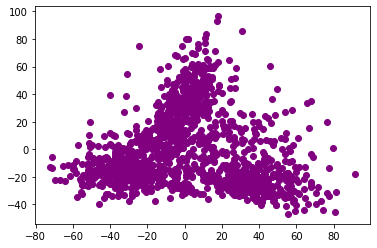

In [55]:
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
data_doc_word_2= pca.fit_transform(data_doc_word)
plt.scatter(data_doc_word_2[:, 0], data_doc_word_2[:, 1], color = 'purple')

(array([-0.8826863, -0.8826863,  9.580446 , ..., -0.8826863, -0.8826863,
       -0.8826863]), '"Finally, the Book of Life and Instructions for Navigating It"')


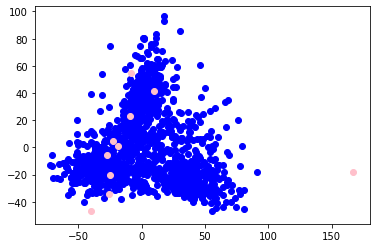

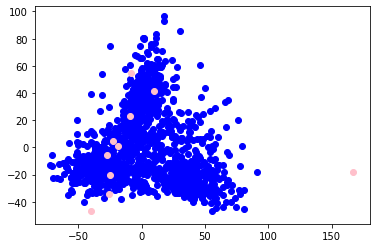

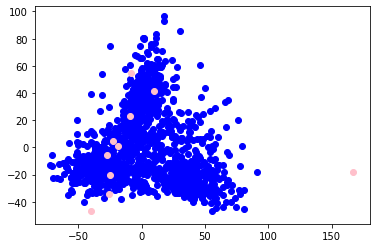

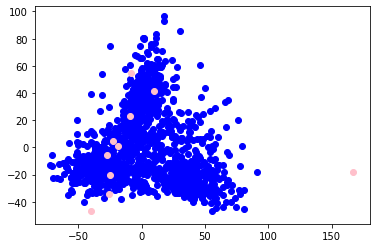

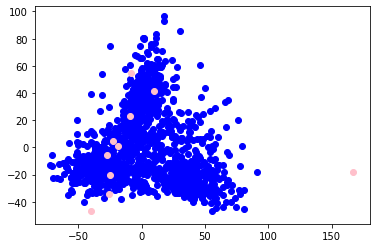

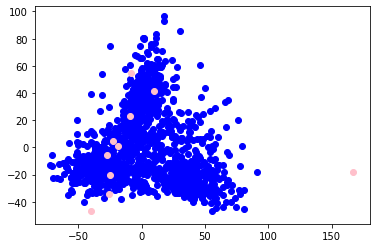

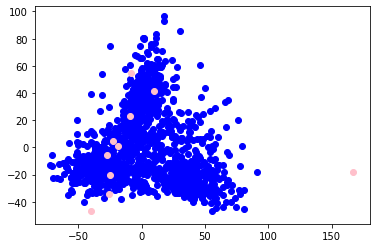

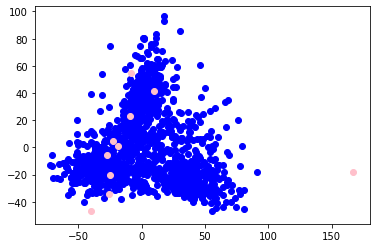

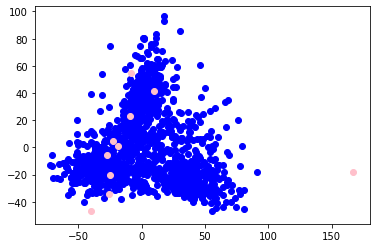

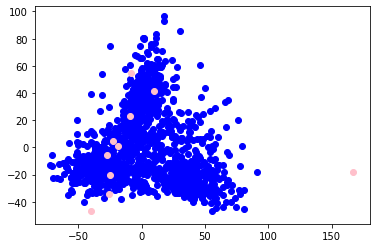

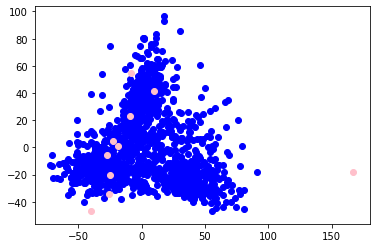

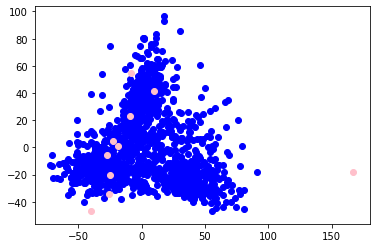

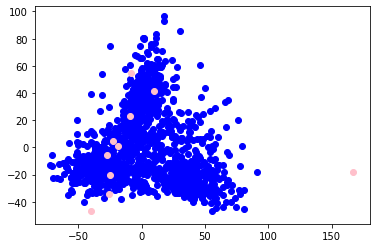

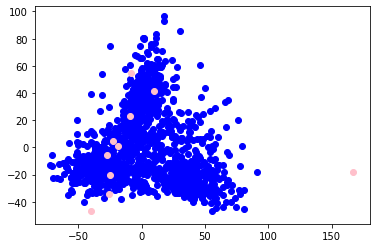

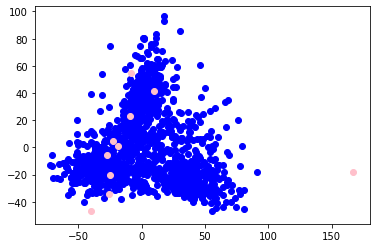

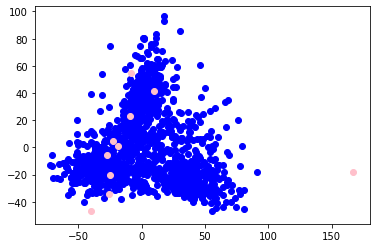

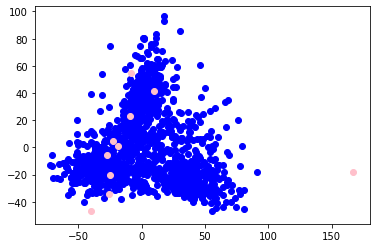

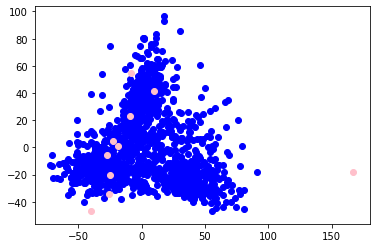

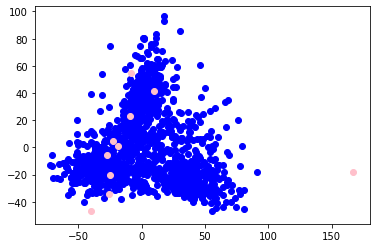

In [54]:
# Analysis for k

#data_doc_word = np.load ("science2k-doc-word.npy")
#titles = open("science2k-titles.txt", "r").read().split("\n")

#select a value of k up to 20, I choose k = 10
k = 10

#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init='k-means++').fit(data_doc_word)
cluster = kmeans.predict(data_doc_word)
ctd = kmeans.cluster_centers_
results = []
for n in range(10):
    results.append([(data_doc_word[x], titles[x]) for x in range(len(cluster)) if cluster[x] == n])
print(results[0][0])

#Cluster the documents using k-means and various values of k (go up to at least k = 20).
#I choose to cluser from k = 2 to k = 21
for k in range(2, 21):
    _ctd = pca.fit_transform(ctd)
    _data_doc_word = pca.fit_transform(data_doc_word)
    
    #Plot the figures of the clusters.
    plt.figure()
    plt.scatter(_data_doc_word[:, 0], _data_doc_word[:, 1], color = u'b')
    plt.scatter(_ctd[:, 0], _ctd[:, 1], color = 'pink')
    plt.show()


In [40]:
#from sklearn.cluster import KMeans

#report the top 10 words of each cluster in order of the largest positive distance from the average value across all data.
def Report_Top_Ten(data_doc_word, n, titles):
    kmeans = KMeans(n_clusters = k, init='k-means++').fit(data_doc_word)
    prediction = kmeans.predict(data_doc_word)

    TopTen = {}

    for clusters in range (n):
        ind_ = [i for i, x in enumerate (prediction) if x == clusters]
        distant = kmeans.transform(data_doc_word)
        dist_ = distant[:,clusters]
        frequency = np.argsort(dist_)[::]
        RankIndex = [index for index in frequency if index in ind_][:10]
        TopTen[clusters + 1] = [titles[ind] for ind in RankIndex]
    
    return TopTen

# Report documents closest to the center
Report_Top_Ten(data_doc_word, 10, titles)     


{1: ['"Closing in on a Deadly Parasite\'s Genome"',
  '"The Business of Stem Cells"',
  '"Malaria Researchers Wait for Industry to Join Fight"',
  '"Simple Hosts May Help Reveal How Bacteria Infect Cells"',
  '"Africa Boosts AIDS Vaccine R&D"',
  '"Research (Genomics) Is Crucial to Attacking Malaria"',
  '"A Renewed Assault on an Old and Deadly Foe"',
  '"DNA Arrays Reveal Cancer in Its Many Forms"',
  '"Stephen Straus\'s Impossible Job"',
  '"South Africa\'s New Enemy"'],
 2: ['"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"',
  '"Ambipolar Pentacene Field-Effect Transistors and Inverters"',
  '"Graphical Evolution of the Arnold Web: From Order to Chaos"',
  '"High-Gain Harmonic-Generation Free-Electron Laser"',
  '"Prospects for the Polymer Nanoengineer"',
  '"Mechanisms of Ordering in Striped Patterns"',
  '"Viscosity Mechanisms in Accretion Disks"',
  '"A Light-Emitting Field-Effect Transistor"',
  '"Signs of Extreme Gravity"',
  '"Anomalous Polarization Prof

Clustering the documents by words provides as an insight into the complete themes of the documents. This algorithm might be helpful if we want to understand the exact content of these documents.

(b) The file science2k-word-doc.txt is similar, but capture term-wise rather than documentwise
features. That is, for each term, we count the frequency as the number of documents that
term appears in rather than the other way around. This allows us to characterize individual
terms.
This matrix is 5476£1373, where each row is a termin Science described by 1373 “document”
features. These are transformed document frequencies (as above). Repeat the analysis above,
but cluster terms instead of documents. The terms are listed in science2k-vocab.txt
Comment on these results. How might such an algorithm be useful? What is different about
clustering terms from clustering documents?

In [42]:
#load the dataset
data_word_doc = np.load ("science2k-word-doc.npy")
vocab = open("science2k-vocab.txt", "r").read().split()
print(data_word_doc.shape)
print(data_word_doc)
print(vocab[0])

(5476, 1373)
[[-6.755691   -6.755691   -6.755691   ...  4.064107    5.093713
   3.707441  ]
 [-4.028205   -4.028205   -4.028205   ... -4.028205   -4.028205
  -4.028205  ]
 [-0.03370464 -1.132184   -0.03370464 ...  0.2539608   1.57568
   0.6594092 ]
 ...
 [-0.1301101  -0.1301101  -0.1301101  ... -0.1301101  -0.1301101
  -0.1301101 ]
 [-0.05128021 -0.05128021 -0.05128021 ... -0.05128021 -0.05128021
  -0.05128021]
 [-0.06441435 -0.06441435 -0.06441435 ... -0.06441435 -0.06441435
  -0.06441435]]
fig


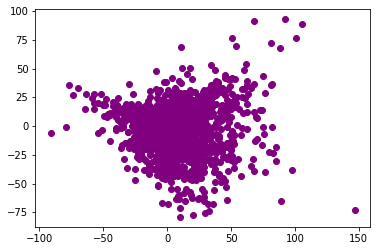

In [59]:
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
data_word_doc_2= pca.fit_transform(data_word_doc)
plt.scatter(data_word_doc_2[:, 0], data_word_doc_2[:, 1], color = 'purple')

(array([-4.028205, -4.028205, -4.028205, ..., -4.028205, -4.028205,
       -4.028205]), 'cells')


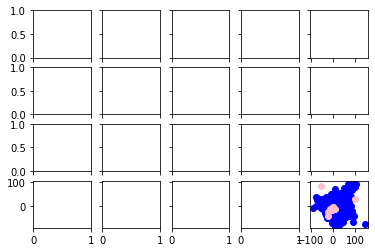

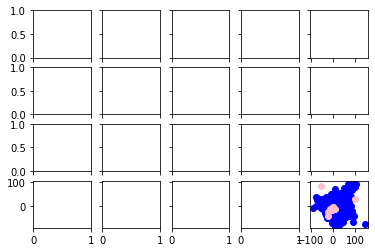

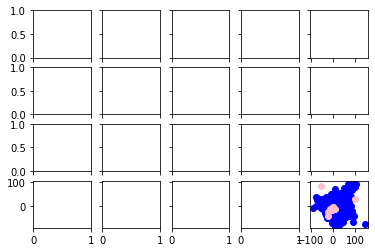

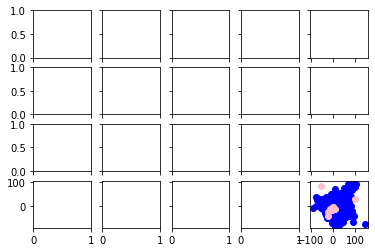

In [ ]:
# Analysis for k


#data_word_doc = np.load ("science2k-word-doc.npy")
#vocab = open("science2k-vocab.txt", "r").read().split()

#select a value of k up to 20, I choose k = 10
k = 10

#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_word_doc)
cluster = kmeans.predict(data_word_doc)
ctd = kmeans.cluster_centers_
results = []
for n in range(10):
    results.append([(data_word_doc[x], vocab[x]) for x in range(len(cluster)) if cluster[x] == n])
print(results[0][0])

#select a value of k up to 20, I choose k = 10
k = 10

#Cluster the documents using k-means and various values of k (go up to at least k = 20).
#I choose to cluser from k = 2 to k = 21
for k in range(2, 21):
    _ctd = pca.fit_transform(ctd)
    _data_word_doc = pca.fit_transform(data_word_doc)
    
    #Plot the figures of the clusters.
    

    fig, ax = plt.subplots(4, 5, sharex='col', sharey='row')
    plt.scatter(_data_word_doc[:, 0], _data_word_doc[:, 1], color = u'b')
    plt.scatter(_ctd[:, 0], _ctd[:, 1], color = 'pink')


In [43]:
#from sklearn.cluster import KMeans

#report the top 10 words of each cluster in order of the largest positive distance from the average value across all data.

def Report_Top_Ten(data_word_doc, n, vocab):
    kmeans = KMeans(n_clusters = k, init='k-means++').fit(data_word_doc)
    prediction = kmeans.predict(data_word_doc)

    TopTen = {}

    for clusters in range (n):
        ind_ = [i for i, x in enumerate (prediction) if x == clusters]
        distant = kmeans.transform(data_word_doc)
        dist_ = distant[:,clusters]
        frequency = np.argsort(dist_)[::]
        RankIndex = [index for index in frequency if index in ind_][:10]
        TopTen[clusters + 1] = [vocab[ind] for ind in RankIndex]
    
    return TopTen

# Report terms closest to the center
Report_Top_Ten(data_word_doc, 10, vocab)

{1: ['varying'],
 2: ['recalls',
  'clinton',
  'fight',
  'prize',
  'spending',
  'hes',
  'rights',
  'pay',
  'chair',
  'told'],
 3: ['org',
  'sciencemag',
  'vol',
  'thymocytes',
  'endothelial',
  'myeloid',
  'caspase',
  'agonists',
  'nmda',
  'immunoreactive'],
 4: ['ribbon',
  'refinement',
  'helices',
  'refined',
  'reflections',
  'helical',
  'crystallographic',
  'polypeptide',
  'hydrophobic',
  'stabilize'],
 5: ['correspondence',
  'addressed',
  'email',
  'fig',
  'reports',
  'indicated',
  'shown',
  'respectively',
  'observed',
  'indicate'],
 6: ['latitude',
  'geophys',
  'uncertainties',
  'modeled',
  'cooling',
  'uncertainty',
  'variability',
  'intervals',
  'inferred',
  'averaged'],
 7: ['outside'],
 8: ['excitations',
  'coulomb',
  'insulating',
  'spins',
  'resonant',
  'coherence',
  'isotropic',
  'magnetization',
  'anisotropic',
  'fermi'],
 9: ['cdna',
  'blot',
  'incubated',
  'kinase',
  'assays',
  'promoter',
  'intracellular',
  'st

Clustering by terms of words provides a direct insight of the usage of the words. This algorithm might be helpful when we want to figure out the trends of the documents or some specific usage of words.